In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kargil
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | avera
Processing Record 7 of Set 1 | san quintin
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | aden
Processing Record 10 of Set 1 | alakurtti
Processing Record 11 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | port hedland
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | mandalgovi
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | halalo
City not found. Skipping...
Processing Record 20 of Set 1

Processing Record 36 of Set 4 | cayenne
Processing Record 37 of Set 4 | gander
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | odessa
Processing Record 40 of Set 4 | half moon bay
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | qena
Processing Record 44 of Set 4 | campina verde
Processing Record 45 of Set 4 | svetlaya
Processing Record 46 of Set 4 | okhotsk
Processing Record 47 of Set 4 | khani
Processing Record 48 of Set 4 | vanimo
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | berdigestyakh
Processing Record 2 of Set 5 | pozega
Processing Record 3 of Set 5 | rudnyy
Processing Record 4 of Set 5 | itarema
Processing Record 5 of Set 5 | tilichiki
Processing Record 6 of Set 5 | changji
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | tuktoyaktuk
Processing Record 9 of Set 5 | west bay
Processing Record 10 of Set 5

Processing Record 23 of Set 8 | baiyin
Processing Record 24 of Set 8 | airai
Processing Record 25 of Set 8 | kysyl-syr
Processing Record 26 of Set 8 | kushmurun
Processing Record 27 of Set 8 | marawi
Processing Record 28 of Set 8 | bjornevatn
Processing Record 29 of Set 8 | sahuaripa
Processing Record 30 of Set 8 | nosy varika
Processing Record 31 of Set 8 | omaruru
Processing Record 32 of Set 8 | marzuq
Processing Record 33 of Set 8 | sakakah
Processing Record 34 of Set 8 | pampa
Processing Record 35 of Set 8 | katsuura
Processing Record 36 of Set 8 | flin flon
Processing Record 37 of Set 8 | kangaatsiaq
Processing Record 38 of Set 8 | dohar
Processing Record 39 of Set 8 | mecca
Processing Record 40 of Set 8 | meulaboh
Processing Record 41 of Set 8 | la romana
Processing Record 42 of Set 8 | tiznit
Processing Record 43 of Set 8 | jaipur hat
City not found. Skipping...
Processing Record 44 of Set 8 | mlowo
Processing Record 45 of Set 8 | burnie
Processing Record 46 of Set 8 | sungaipen

Processing Record 13 of Set 12 | pa daet
Processing Record 14 of Set 12 | broome
Processing Record 15 of Set 12 | viligili
City not found. Skipping...
Processing Record 16 of Set 12 | pangnirtung
Processing Record 17 of Set 12 | kavaratti
Processing Record 18 of Set 12 | hobyo
Processing Record 19 of Set 12 | port macquarie
Processing Record 20 of Set 12 | scarborough
Processing Record 21 of Set 12 | tlanchinol
Processing Record 22 of Set 12 | tete
Processing Record 23 of Set 12 | caravelas
Processing Record 24 of Set 12 | belawan
Processing Record 25 of Set 12 | poum
Processing Record 26 of Set 12 | ratodero
Processing Record 27 of Set 12 | temaraia
City not found. Skipping...
Processing Record 28 of Set 12 | assomada
Processing Record 29 of Set 12 | ponta delgada
Processing Record 30 of Set 12 | kodinsk
Processing Record 31 of Set 12 | buritizeiro
Processing Record 32 of Set 12 | falealupo
City not found. Skipping...
Processing Record 33 of Set 12 | skjervoy
Processing Record 34 of S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kargil,34.5667,76.1000,15.17,52,0,2.35,IN,2021-11-12 23:49:57
1,Souillac,-20.5167,57.5167,72.36,88,20,3.44,MU,2021-11-12 23:49:57
2,Ushuaia,-54.8000,-68.3000,51.46,62,40,8.05,AR,2021-11-12 23:49:58
3,Avera,33.1940,-82.5271,59.54,37,0,4.59,US,2021-11-12 23:49:58
4,San Quintin,30.4833,-115.9500,76.68,33,20,8.52,MX,2021-11-12 23:49:59
5,Laguna,38.4210,-121.4238,75.04,82,1,1.99,US,2021-11-12 23:49:59
6,Aden,12.7794,45.0367,81.16,61,99,15.88,YE,2021-11-12 23:48:22
7,Alakurtti,66.9672,30.3491,17.64,97,41,3.15,RU,2021-11-12 23:50:00
8,Castro,-24.7911,-50.0119,54.12,92,37,11.12,BR,2021-11-12 23:47:38
9,Port Hedland,-20.3167,118.5667,84.25,12,86,21.85,AU,2021-11-12 23:50:01


In [11]:
# We'll reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kargil,IN,2021-11-12 23:49:57,34.5667,76.1000,15.17,52,0,2.35
1,Souillac,MU,2021-11-12 23:49:57,-20.5167,57.5167,72.36,88,20,3.44
2,Ushuaia,AR,2021-11-12 23:49:58,-54.8000,-68.3000,51.46,62,40,8.05
3,Avera,US,2021-11-12 23:49:58,33.1940,-82.5271,59.54,37,0,4.59
4,San Quintin,MX,2021-11-12 23:49:59,30.4833,-115.9500,76.68,33,20,8.52
...,...,...,...,...,...,...,...,...,...
535,Amantea,IT,2021-11-12 23:53:42,39.1332,16.0746,58.44,80,83,6.26
536,Inongo,CD,2021-11-12 23:53:42,-1.9500,18.2667,71.56,94,91,2.30
537,Papetoai,PF,2021-11-12 23:53:43,-17.4961,-149.8729,83.79,58,85,3.89
538,San Pedro,PH,2021-11-12 23:53:43,14.3500,121.0167,84.31,76,40,1.14


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

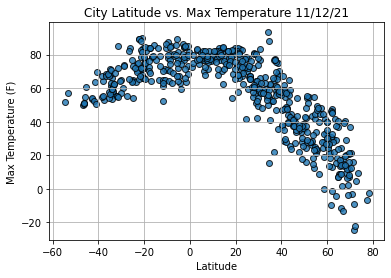

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

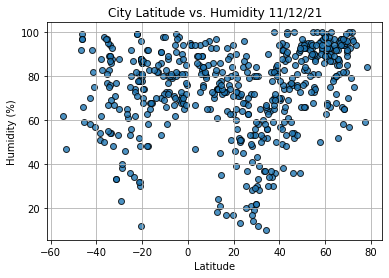

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

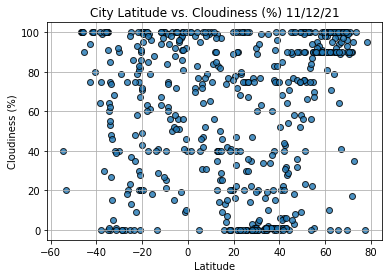

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

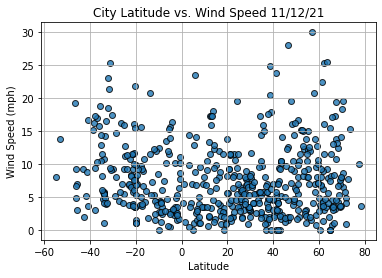

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-11-12 23:50:03
Lat                        -33.65
Lng                      115.3333
Max Temp                    57.09
Humidity                       54
Cloudiness                     48
Wind Speed                  14.29
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kargil,IN,2021-11-12 23:49:57,34.5667,76.1000,15.17,52,0,2.35
3,Avera,US,2021-11-12 23:49:58,33.1940,-82.5271,59.54,37,0,4.59
4,San Quintin,MX,2021-11-12 23:49:59,30.4833,-115.9500,76.68,33,20,8.52
5,Laguna,US,2021-11-12 23:49:59,38.4210,-121.4238,75.04,82,1,1.99
6,Aden,YE,2021-11-12 23:48:22,12.7794,45.0367,81.16,61,99,15.88


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

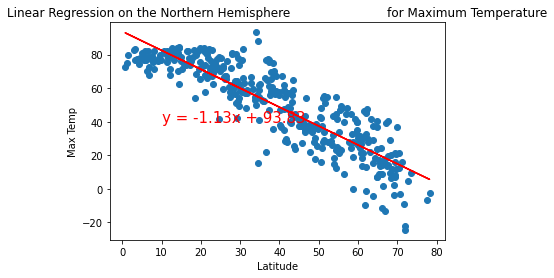

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

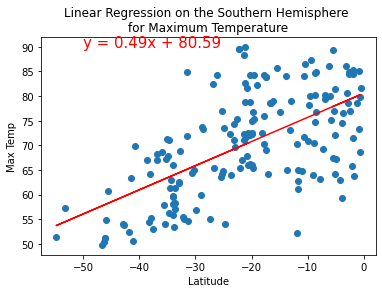

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

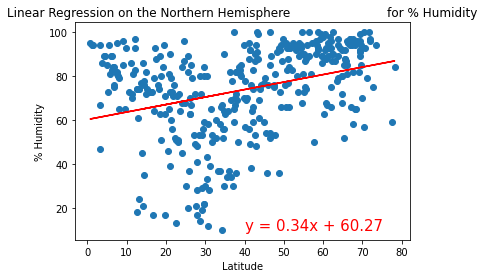

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

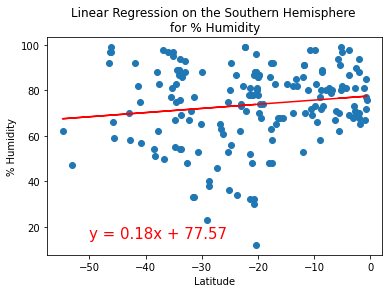

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

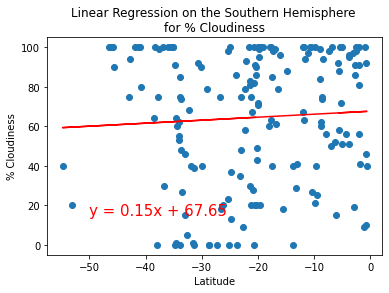

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

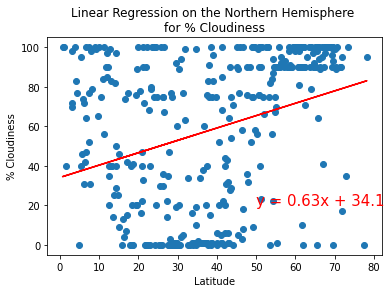

In [29]:
#Skill Drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,20))

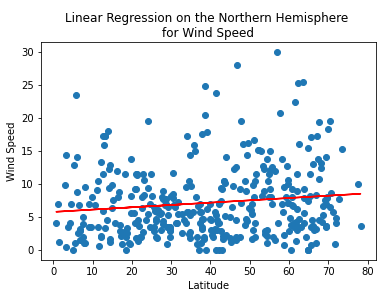

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

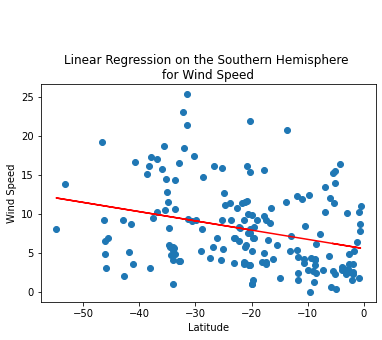

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))